In [1]:
# Precision of the Sun
from eniric import Qcalculator
import matplotlib.pyplot as plt
import numpy as np

/home/jneal/Documents/github/eniric/eniric/__init__.py:15: UserWarning: Using the default config.yaml file located at /home/jneal/Documents/github/eniric/eniric/config.yaml. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.
  warnings.warn("Using the default config.yaml file located at {0}. This is likely NOT what you want. Please create a similar 'config.yaml' file in your current working directory.".format(default), UserWarning)


In [2]:
def get_wavelength(hdr, convert=False):
    """Return the wavelength vector calculated from the header of a FITS
    file.
    Input
    -----
    hdr : FITS header
      Header from a FITS ('CRVAL1', 'CDELT1', and 'NAXIS1' is required as keywords)
    convert : bool
      If True, multiple the wavelength vector with 10 (nm -> AA)
    Output
    ------
    w : ndarray
      Equidistant wavelength vector
    """
    w0, dw, n = hdr['CRVAL1'], hdr['CDELT1'], hdr['NAXIS1']
    w1 = w0 + dw * n
    w = np.linspace(w0, w1, n, endpoint=False)
    if convert:
        w *= 10
    return w

In [3]:
from astropy.io import fits
data1, hdr1 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2006-05-22_s1d.fits", header=True)
wave1 = get_wavelength(hdr1, convert=False)
data2, hdr2 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2006-07-15_s1d.fits", header=True)
wave2 = get_wavelength(hdr2, convert=False)
data3, hdr3 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2009-02-08_s1d.fits", header=True)
wave3 = get_wavelength(hdr3, convert=False)
data4, hdr4 = fits.getdata("/home/jneal/.handy_spectra/harps/ganymede_2007-04-12_s1d.fits", header=True)
wave4 = get_wavelength(hdr4, convert=False)
data5, hdr5 = fits.getdata("/home/jneal/.handy_spectra/harps/moon_2008-08-08_s1d.fits", header=True)
wave5 = get_wavelength(hdr5, convert=False)
#print(hdr1)
#print(wave1)

In [4]:
"/home/jneal/.handy_spectra/harps/ceres_2006-05-22_s1d.fits"
"/home/jneal/.handy_spectra/harps/ceres_2006-07-15_s1d.fits"
"/home/jneal/.handy_spectra/harps/ceres_2009-02-08_s1d.fits"
"/home/jneal/.handy_spectra/harps/ganymede_2007-04-12_s1d.fits"
"/home/jneal/.handy_spectra/harps/moon_2008-08-08_s1d.fits"

'/home/jneal/.handy_spectra/harps/moon_2008-08-08_s1d.fits'

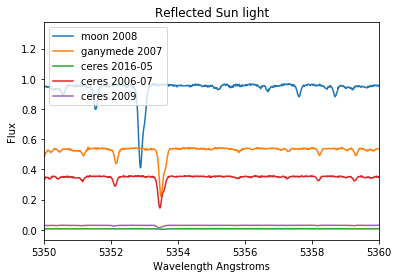

In [5]:
plt.plot(wave5, data5, label="moon 2008")
plt.plot(wave4, data4, label="ganymede 2007")
plt.plot(wave1, data1, label="ceres 2016-05")
plt.plot(wave2, data2, label="ceres 2006-07")
plt.plot(wave3, data3, label="ceres 2009")

plt.title("Reflected Sun light")
plt.ylabel("Flux")
plt.xlabel("Wavelength Angstroms")
plt.legend()
plt.xlim(5350, 5360)
plt.show()

In [6]:
# Calculate precisions for each half.
waves = [wave1, wave2, wave3, wave4]
fluxes = [data1, data2, data3, data4]

# Naviely calculate the precision with given value
xmin = 4000
xmid1 = 5300
xmid2 = 5350
xend = 6800

# First precision
print("First half of spectrum")
for w, f in zip(waves, fluxes):
    m = (w <= xmid1) & (w >= xmin)
    prec = Qcalculator.RVprec_calc(w[m], f[m])
    print(prec)
    
# Second half precision
print("\nSecond half of spectrum")
for w, f in zip(waves, fluxes):
    m = (w <= xend) & (w >= xmid2)
    prec = Qcalculator.RVprec_calc(w[m], f[m])
    print(prec)


First half of spectrum
wis = 527423.8091345673
568.4090342677548 m / s
wis = 3500158.5952229053
85.65110689817412 m / s
wis = 1964176.0156049107
152.63013885630428 m / s
wis = 4103069.8461109744
73.06540450052373 m / s

Second half of spectrum
wis = 278212.5234310085
1077.5663665418817 m / s
wis = 1562932.6973820874
191.8140547588213 m / s
wis = 828491.3948216835
361.85343610542196 m / s
wis = 1970771.7107379453
152.11932278434435 m / s


In [7]:
# Figure you Resolution element
# Resample to 11000 with 3 pixel sampling
from eniric import resample
R=110000
mask = (wave1 <= 6500 ) & (wave1 >= 5350)
w = wave1[mask]
f = data1[mask]
wave = resample.log_resample(w, 3, R)
flux = np.interp(wave, w, f)
new_prec = Qcalculator.RVprec_calc(wave, flux)
print(new_prec)

wis = 171473.20196305352
1748.334168650999 m / s


In [8]:
# Scaling all spectra to a SNR per resolution element to 
from eniric.snr_normalization import snr_constant_wav
snr = 200
wav_ref = 5356

const1 = snr_constant_wav(wave1, data1, wav_ref=wav_ref, snr = snr,sampling=3)
const2 = snr_constant_wav(wave2, data2, wav_ref=wav_ref, snr = snr,sampling=3)
const3 = snr_constant_wav(wave3, data3, wav_ref=wav_ref, snr = snr,sampling=3)
const4 = snr_constant_wav(wave4, data4, wav_ref=wav_ref, snr = snr,sampling=3)
const5 = snr_constant_wav(wave5, data5, wav_ref=wav_ref, snr = snr,sampling=3)
const6 = snr_constant_wav(wave5, data5/const5, wav_ref=wav_ref, snr = snr,sampling=3)



	Sanity Check: The S/N for the reference model was of 0.14.
	Sanity Check: The S/N for the reference model was of 1.03.
	Sanity Check: The S/N for the reference model was of 0.30.
	Sanity Check: The S/N for the reference model was of 1.27.
	Sanity Check: The S/N for the reference model was of 1.70.
	Sanity Check: The S/N for the reference model was of 200.00.


In [9]:
# First precision
print("First half of spectrum")
consts = [const1, const2, const3, const4, const5]
for w, f, c in zip(waves, fluxes, consts):
    m = (w <= xmid1) & (w >= xmin)
    prec = Qcalculator.RVprec_calc(w[m], f[m]/c)
    print(prec)
    
# Second half precision
print("\nSecond half of spectrum")
for w, f, c in zip(waves, fluxes,consts):
    m = (w <= xend) & (w >= xmid2)
    prec = Qcalculator.RVprec_calc(w[m], f[m]/c)
    print(prec)


First half of spectrum
wis = 735576602.3896608
0.40756116633681255 m / s
wis = 679948041.9185692
0.4409049508460872 m / s
wis = 1306819946.75237
0.22940609281716742 m / s
wis = 646152189.7756131
0.4639657076827486 m / s

Second half of spectrum
wis = 388011725.66796505
0.7726376245045303 m / s
wis = 303618537.50672907
0.9873983995241257 m / s
wis = 551217955.7348164
0.5438728090784948 m / s
wis = 310357489.60984844
0.9659585092561169 m / s


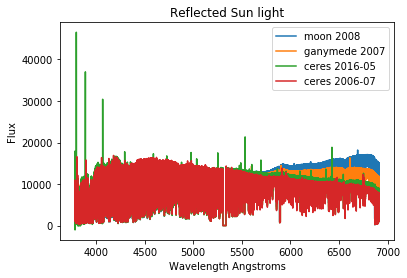

In [10]:
plt.plot(wave5, data5/const5, label="moon 2008")
plt.plot(wave4, data4/const4, label="ganymede 2007")
plt.plot(wave1, data1/const1, label="ceres 2016-05")
plt.plot(wave2, data2/const2, label="ceres 2006-07")
#plt.plot(wave3, data3/const3, label="ceres 2009")

plt.title("Reflected Sun light")
plt.ylabel("Flux")
plt.xlabel("Wavelength Angstroms")
plt.legend()
#plt.xlim(5350, 5360)
plt.show()

32
[8544.33   9739.11   9944.49   ... 3734.317  3434.961  3847.5918]
wis = 556822513.923107
[3847.5918 4838.411  4872.681  ... 8610.337  7497.142  6521.2666]
wis = 283164064.5989803
[ 6521.2666  7310.4487  7437.3154 ... 13900.092  14268.03   13907.417 ]
wis = 282434422.57993364
[13907.417 13597.945 13658.15  ... 14779.897 14257.414 14026.774]
wis = 255703523.87234798
[13965.359  14275.018  14339.248  ...  5871.646   5207.5273  4927.3135]
wis = 249386945.96182323
[ 5126.054  5397.134  6002.813 ... 10749.087 10468.784 10202.85 ]
wis = 237528926.8606929
[ 9665.159  9676.932 10127.553 ... 10573.859  9994.26   9152.061]
wis = 229825586.19754115
[ 8780.587   8254.125   7573.2524 ... 14647.975  14693.844  14772.408 ]
wis = 203731033.83910224
[14784.419 14786.974 14526.718 ... 14154.503 14217.904 13767.375]
wis = 183049415.87246466
[13996.244 14443.284 14407.939 ... 14065.728 14342.406 14096.73 ]
wis = 162998890.39603803
[14229.584  14481.734  14106.809  ... 12862.3125 13047.924  13266.298 ]
w

/home/jneal/Documents/github/eniric/eniric/Qcalculator.py:123: RuntimeWarning: divide by zero encountered in true_divide
  flux_variance[:-1]))
/home/jneal/Documents/github/eniric/eniric/Qcalculator.py:123: RuntimeWarning: invalid value encountered in true_divide
  flux_variance[:-1]))
/home/jneal/Documents/github/eniric/eniric/Qcalculator.py:125: UserWarning: Weight sum is not finite
  warnings.warn("Weight sum is not finite")


[10629.924 10695.324 10683.294 ... 10261.095 10281.708 10320.826]
wis = 75735432.95436427
[10245.127  10089.568  10085.384  ...  9165.693   9155.427   9111.6875]
wis = 172367750.73618215
[6158.9883 5489.729  4155.1626 ... 4958.199  5552.749  6427.679 ]
wis = 218767053.11750025
[6427.679  7044.56   7451.752  ... 7345.2607 8127.447  8857.647 ]
wis = 199282152.10839143
[ 9511.034  9765.468 10197.504 ... 13290.252 13211.435 13284.944]
wis = 243207521.9747707
[13130.135 12804.06  12602.279 ... 14283.757 14321.961 14309.636]
wis = 230110744.7375222
[13864.652  13570.983  13302.593  ...  5593.131   6470.8374  7461.9966]
wis = 230839504.5195892
[ 8697.751   9861.246  10835.006  ... 10147.712  10540.528  11023.8545]
wis = 218790680.66789487
[11569.545  11985.31   12530.564  ...  8240.065   7925.4907  7834.771 ]
wis = 215006449.8737188
[ 7917.3555  8119.8555  8687.689  ... 15507.726  15352.838  14983.988 ]
wis = 195607933.50914395
[14518.795 14334.264 13756.231 ... 15469.006 15492.98  15421.197]

Text(0.5,1,'100 SNR at ~5350 nm')

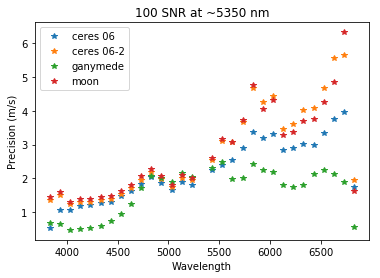

In [11]:
# Break into small chunks and divide by SNR at 5350nm
chunks = np.arange(wave1[0], wave1[-1]+2, 100)
print(len(chunks))
waves = [wave1, wave2, wave3, wave4]
fluxes = [data1, data2, data3, data4]
labels=["ceres 06", "ceres 06-2", "ganymede", "moon"]

for w, f, c, l in zip(waves, fluxes, consts, labels):
    prec = []
    center = []
    for ii in range(len(chunks)-1):
        xmin=chunks[ii]
        xmax = chunks[ii+1]
        m = (w <= xmax) & (w >= xmin)
        print(f[m]/c)
        prec.append(Qcalculator.RVprec_calc(w[m], f[m]/c).value)
        center.append((xmax + xmin)/2)
    plt.plot(center, prec, "*", label=l)

plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Precision (m/s)")
plt.title("100 SNR at ~5350 nm")


In [12]:
from astropy.io import fits
data1, hdr1 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2006-05-22_s1d.fits", header=True)
wave1 = get_wavelength(hdr1, convert=False)
data2, hdr2 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2006-07-15_s1d.fits", header=True)
wave2 = get_wavelength(hdr2, convert=False)
data3, hdr3 = fits.getdata("/home/jneal/.handy_spectra/harps/ceres_2009-02-08_s1d.fits", header=True)
wave3 = get_wavelength(hdr3, convert=False)
data4, hdr4 = fits.getdata("/home/jneal/.handy_spectra/harps/ganymede_2007-04-12_s1d.fits", header=True)
wave4 = get_wavelength(hdr4, convert=False)
data5, hdr5 = fits.getdata("/home/jneal/.handy_spectra/harps/moon_2008-08-08_s1d.fits", header=True)
wave5 = get_wavelength(hdr5, convert=False)

label ceres 06
ii 0
	Sanity Check: The S/N for the reference model was of 0.09.
wis = 777254360.7635198
ii 1
	Sanity Check: The S/N for the reference model was of 0.06.
wis = 930095521.2988507
ii 2
	Sanity Check: The S/N for the reference model was of 0.13.
wis = 412399412.0530747
ii 3
	Sanity Check: The S/N for the reference model was of 0.12.
wis = 419502619.2623949
ii 4
	Sanity Check: The S/N for the reference model was of 0.13.
wis = 346815626.9810918
ii 5
	Sanity Check: The S/N for the reference model was of 0.14.
wis = 306491978.12045956
ii 6
	Sanity Check: The S/N for the reference model was of 0.14.
wis = 267433838.7493101
ii 7
	Sanity Check: The S/N for the reference model was of 0.11.
wis = 325511492.67609334
ii 8
	Sanity Check: The S/N for the reference model was of 0.15.
wis = 216812616.03065127
ii 9
	Sanity Check: The S/N for the reference model was of 0.14.
wis = 202661532.06678155
ii 10
	Sanity Check: The S/N for the reference model was of 0.14.
wis = 194342259.20728633


/home/jneal/anaconda3/envs/eniric/lib/python3.6/site-packages/astropy/units/quantity.py:641: RuntimeWarning: divide by zero encountered in true_divide
  *arrays, **kwargs)


wis is zero
wis = 0.0
2.0956820245837668e-06 inf
ii 3
	Sanity Check: The S/N for the reference model was of 0.14.
wis is zero
wis = 0.0
2.0922005175912694e-06 inf
ii 4
	Sanity Check: The S/N for the reference model was of 0.14.
wis is zero
wis = 0.0
2.0687789422456858e-06 inf
ii 5
	Sanity Check: The S/N for the reference model was of 0.13.
wis is zero
wis = 0.0
1.7182599674484322e-06 inf
ii 6
	Sanity Check: The S/N for the reference model was of 0.13.
wis is zero
wis = 0.0
1.8092634250159498e-06 inf
ii 7
	Sanity Check: The S/N for the reference model was of 0.00.
wis is zero
wis = 0.0
0.0 inf
ii 8
	Sanity Check: The S/N for the reference model was of 0.14.
wis is zero
wis = 0.0
1.8700618937117718e-06 inf
ii 9
	Sanity Check: The S/N for the reference model was of 0.14.
wis is zero
wis = 0.0
1.9898342497842945e-06 inf
ii 10
	Sanity Check: The S/N for the reference model was of 0.12.
wis is zero
wis = 0.0
1.3360756702516461e-06 inf
ii 11
	Sanity Check: The S/N for the reference model was 

wis = 196264694.73818675
ii 9
	Sanity Check: The S/N for the reference model was of 1.28.
wis = 181726743.2142407
ii 10
	Sanity Check: The S/N for the reference model was of 1.17.
wis = 181477205.84767357
ii 11
	Sanity Check: The S/N for the reference model was of 1.27.
wis = 154299819.1058529
ii 12
	Sanity Check: The S/N for the reference model was of 1.17.
wis = 148359688.8593526
ii 13
	Sanity Check: The S/N for the reference model was of 1.28.
wis = 107046249.1325214
ii 14
	Sanity Check: The S/N for the reference model was of 1.27.
wis = 80671399.3363415
ii 0
	Sanity Check: The S/N for the reference model was of 1.26.
wis is zero
wis = 0.0
0.00015785888609009508 inf
ii 1
	Sanity Check: The S/N for the reference model was of 1.32.
wis is zero
wis = 0.0
0.00017538732406433295 inf
ii 2
	Sanity Check: The S/N for the reference model was of 1.30.
wis is zero
wis = 0.0
0.00016879260564765133 inf
ii 3
	Sanity Check: The S/N for the reference model was of 1.29.
wis is zero
wis = 0.0
0.00016

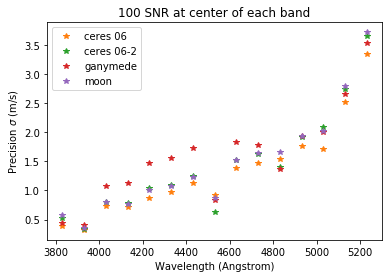

In [13]:
# Break into small chunks and divide by SNR at 5350nm
chunks = np.arange(wave1[0], 5300, 100)
chunks2 = np.arange(5350, wave1[-1], 100)
waves = [wave1, wave2, wave3, wave4]
fluxes = [data1, data2, data3, data4]
labels=["ceres 06", "ceres 06-2", "ganymede", "moon"]
colors = ["C1", "C2", "C3", "C4"]

for w, f, c, l, cl in zip(waves, fluxes, consts, labels, colors):
    print("label", l)
    prec = []
    center = []
    prec2 = []
    center2 = []
    for ii in range(len(chunks)-1):
        print("ii", ii)
        xmin = chunks[ii]
        xmax = chunks[ii+1]
        
        this_center = (xmax + xmin)/2
        center.append(this_center)
        # print(len(w), len(f))
        scale = snr_constant_wav(wav=w, flux=f, wav_ref=this_center)
        #print("scale", scale)
        m = (w <= xmid1) & (w >= xmin)
        prec.append(Qcalculator.RVprec_calc(w[m], f[m]/scale).value)
    
    for ii in range(len(chunks2)-1):
        print("ii", ii)
        xmin = chunks2[ii]
        xmax = chunks[ii+1]
        
        this_center = (xmax + xmin)/2
        center2.append(this_center)
        # print(len(w), len(f))
        scale = snr_constant_wav(wav=w, flux=f, wav_ref=this_center)
        #print("scale", scale)
        m = (w <= xmid1) & (w >= xmin)
        prec2.append(Qcalculator.RVprec_calc(w[m], f[m]/scale).value)
        print(scale, prec2[-1])
        
        
    plt.plot(center, prec, "*", label=l, color=cl)
    plt.plot(center2, prec2, "*", color=cl)


plt.legend()
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Precision $\sigma$ (m/s)")
plt.title("100 SNR at center of each band")
plt.show()

# How does Sampling affect the precision?

Hmmm it seems to be inverse-squarely correlated again....

Is higher sampling affecting the dirivitives...

wis = 51209.84312917167
wis = 83635.4095030927
wis = 171473.20196305352
wis = 235632.93774666477
wis = 283917.13284121145
wis = 345419.0307320261


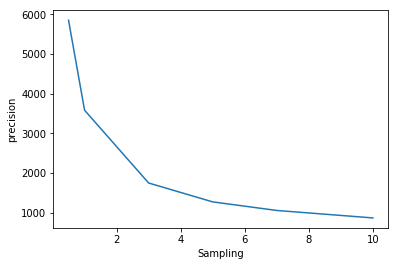

In [14]:
R=110000
mask = (wave1 <= 6500 ) & (wave1 >= 5350)
w = wave1[mask]
f = data1[mask]

samples = [0.5, 1, 3, 5, 7, 10]
sample_prec = []
for sampling in samples:

    wave = resample.log_resample(w, sampling, R)
    flux = np.interp(wave, w, f)
    sample_prec.append(Qcalculator.RVprec_calc(wave, flux).value)
plt.plot(samples, sample_prec)
plt.xlabel("Sampling")
plt.ylabel("precision")
plt.show()